In [19]:
import pandas as pd, matplotlib.pyplot as plt, scipy.stats as stats, seaborn as sns, ast
url = "https://raw.githubusercontent.com/nkmwicz/worldcup2018data/refs/heads/main/cleaned_events_world_cup2018.csv"

df = pd.read_csv(url)
df.head()


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2
0,8,Simple pass,['Accurate'],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0
1,8,High pass,['Accurate'],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0
2,1,Air duel,"['Won', 'Accurate']",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0
3,1,Air duel,"['Lost', 'Not accurate']",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0
4,8,Simple pass,['Accurate'],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0


In [20]:
df['tags'] = df['tags'].apply(ast.literal_eval)
df['tags'].head()

0              [Accurate]
1              [Accurate]
2         [Won, Accurate]
3    [Lost, Not accurate]
4              [Accurate]
Name: tags, dtype: object

In [21]:
df['eventName'].unique()

array(['Pass', 'Duel', 'Free Kick', 'Foul', 'Others on the ball', 'Shot',
       'Save attempt', 'Offside', 'Goalkeeper leaving line'], dtype=object)

In [22]:
# create is_pass column => int
df['is_pass'] = df['eventName'].apply(lambda item: item == "Pass").astype(int)
df['is_pass'].sum()

np.int64(56457)

In [23]:
# create is_goal column => int
df['is_goal'] = df.apply(
    lambda row: row['eventName'] == "Shot" and "Goal" in row["tags"], 
    axis=1
).astype(int)
df['is_goal'].sum()

np.int64(128)

In [24]:
df.head(2)

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,is_pass,is_goal
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,1,0
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,1,0


In [25]:
# group by matchId and teamId
group_df = df.groupby(['matchId', 'teamId']).agg(
    passes = ("is_pass", "sum"),
    goals = ("is_goal", "sum"),
).reset_index()
group_df

,matchId,teamId,passes,goals
0,"Argentina - Croatia, 0 - 3",Argentina,476,0
1,"Argentina - Croatia, 0 - 3",Croatia,334,3
2,"Argentina - Iceland, 1 - 1",Argentina,744,1
3,"Argentina - Iceland, 1 - 1",Iceland,183,1
4,"Australia - Peru, 0 - 2",Australia,512,0
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,238,2
124,"Uruguay - Russia, 3 - 0",Russia,327,0
125,"Uruguay - Russia, 3 - 0",Uruguay,466,1
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,553,0


In [30]:
# get r, p and r_sq
def create_regplot(df: pd.DataFrame, x:str, y:str) -> None:
    x_data= df[x]
    y_data = df[y]
    r, p = stats.pearsonr(x_data, y_data)
    r_sq = r**2
    text=f"r-val={r:.3f}\np-val={p:.3f}\nr-sq={r_sq:.3f}"
    reg = sns.regplot(
        data=df,
        x=x, 
        y=y,
        scatter_kws = {"color": "blue", "alpha": 0.5},
        line_kws = {"color": "red", "label": "line of the best fit"}   
    )
    plt.text(0.15, 0.70, text, transform=plt.gcf().transFigure)
    reg.set(
        xlabel = x.replace("_", " ").title(),
        ylabel = y.replace("_", " ").title(),
    )
    plt.show()

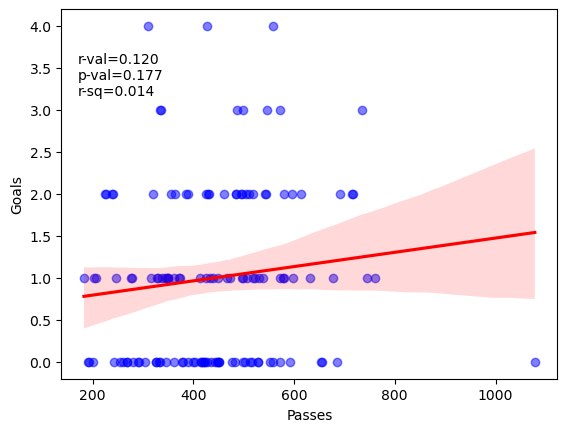

In [31]:
create_regplot(df=group_df, x="passes", y="goals")

In [32]:
adf = df.loc[df['x2']>66]
#adf = df.loc[df['x2']>33]
adf
df['shot'] = df['eventName'].apply(lambda x: x=="Shot").astype(int)

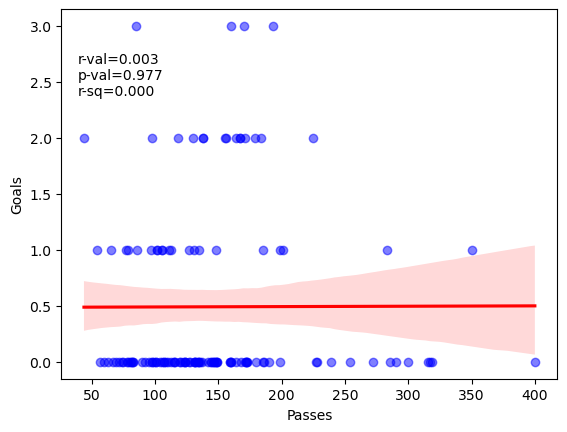

In [33]:
group_adf = adf.groupby(['matchId', 'teamId']).agg(
    passes = ("is_pass", "sum"),
    goals = ("is_goal", "sum"),
).reset_index()
group_adf
create_regplot(group_adf, "passes", "goals")

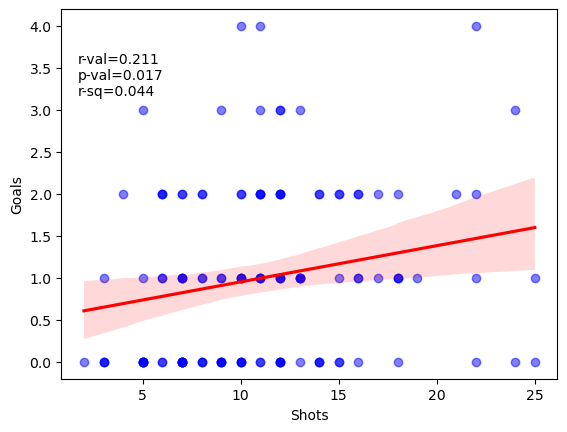

In [34]:
group_adf = df.groupby(['matchId', 'teamId']).agg(
    shots = ("shot", "sum"),
    goals = ("is_goal", "sum"),
).reset_index()
group_adf
create_regplot(group_adf, "shots", "goals")